# Project: Predicting Heart Disease with Supervised Learning 

# Introduction
The WHO has announced that cardiovascular diseases are responsible for the most deaths throughout the world. There are seventeen million people who die from it every year, especially heart disease. Prevention is better than cure; if we can evaluate the risk of everybody, not just potential patients, who show a likelihood of heart disease, we can prevent the disease from developing. This dataset contains real data, including important features of patients.

In this project, we will employ several supervised learning algorithms trained on a dataset containing important features of real patients to accurately model individuals' heart conditions. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. 

Our goal with this implementation is to construct a model that accurately predicts whether an individual has heart disease.

# Exploring the Data

In [13]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from time import time
from IPython.display import display
%matplotlib inline

## Loading dataset

In [14]:
heart_data = pd.read_csv('/Users/lt/Desktop/heart_disease_data.csv')
display(heart_data.head(5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Display the last five records
heart_data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Total number of records
n_records = len(heart_data.index)

# Number of records where individual has heart disease
n_positive_results = len(heart_data[heart_data.target == 1])

# Percentage of individuals who have heart diesease
posive_percent = (n_positive_results / float(n_records)) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals with heart disease: {}".format(n_positive_results))
print("Percentage of individuals with heart disease: {:.2f}%".format(posive_percent))

Total number of records: 303
Individuals with heart disease: 165
Percentage of individuals with heart disease: 54.46%


## Featureset Exploration 

- **age**: The person's age in years 

- **sex**: The person's sex (1 = male, 0 = female) 

- **cp**: Chest pain in 4 values (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) 

- **trestbps**: Resting blood pressure  

- **chol**: Cholesterol measurement in mg/dl 

- **fbs**: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 

- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 

- **thalach**: Maximum heart rate achieved 

- **exang**: Exercise induced angina (1 = yes; 0 = no) 

- **oldpeak**: ST depression induced by exercise relative to rest 

- **slope**: The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping) 

- **ca**: The number of major vessels (0-3) 

- **thal**: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect, 0 could be missing/error data) 

- **target label**: Heart disease (0 = no, 1 = yes) 

## Exploring Numerical features

In [6]:
numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
heart_data[numerical_features].describe(include='all')

,age,chol,trestbps,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,246.264026,131.623762,149.646865,1.039604
std,9.082101,51.830751,17.538143,22.905161,1.161075
min,29.000000,126.000000,94.000000,71.000000,0.000000
25%,47.500000,211.000000,120.000000,133.500000,0.000000
50%,55.000000,240.000000,130.000000,153.000000,0.800000
75%,61.000000,274.500000,140.000000,166.000000,1.600000
max,77.000000,564.000000,200.000000,202.000000,6.200000


##  Numerical Features Visualization <a class="anchor" id="2"></a>

### Pair-plot 
A pairplot is used to visualise the correlation between numerical features and the target

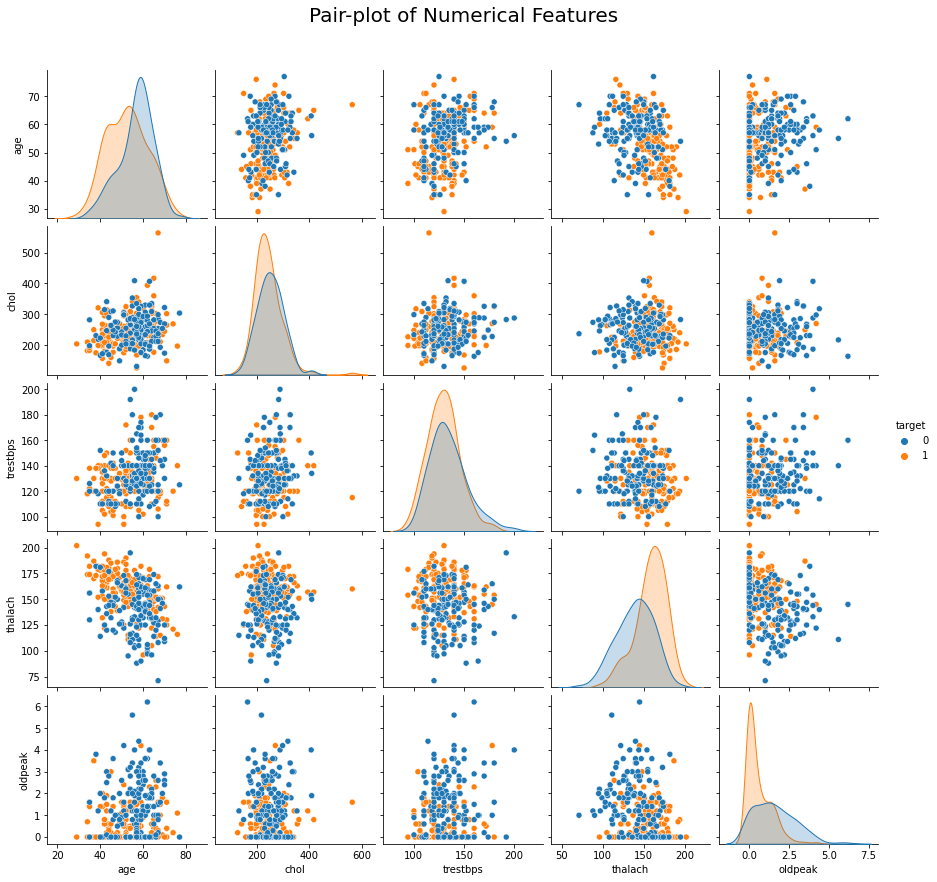

In [30]:
features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target']
num_data = heart_data[features]
sns.pairplot(num_data, hue="target") 
plt.suptitle('Pair-plot of Numerical Features', fontsize=20)
plt.subplots_adjust(top=0.91)
plt.show()

### Reg-plot
High cholesterol and ageing are known to be the leading cause of heart disease.
Below we have taken a closer look at these two features to further analyse their relationship with selected features they could be linked to.

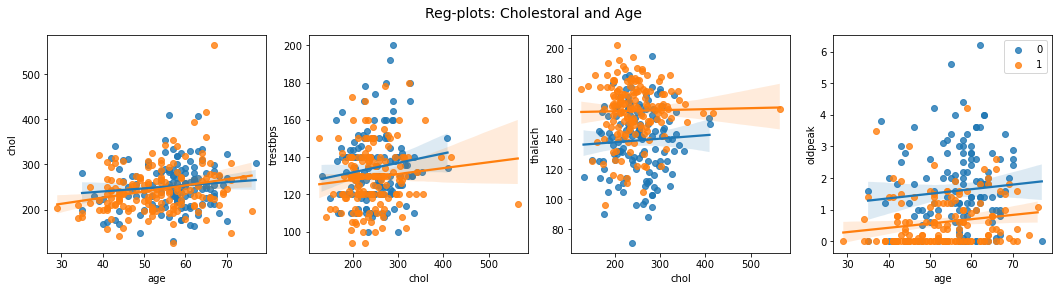

In [82]:
fig, ax = plt.subplots(1,4, figsize=(18, 4))

sns.regplot(data=heart_data[heart_data['target'] ==0], x='age', y='chol', ax = ax[0], label='0')
sns.regplot(data=heart_data[heart_data['target'] ==1], x='age', y='chol', ax = ax[0], label='1')

sns.regplot(data=heart_data[heart_data['target'] ==0], x='chol', y='trestbps', ax = ax[1], label='0')
sns.regplot(data=heart_data[heart_data['target'] ==1], x='chol', y='trestbps', ax = ax[1], label='1')

sns.regplot(data=heart_data[heart_data['target'] ==0], x='chol', y='thalach', ax = ax[2], label='0')
sns.regplot(data=heart_data[heart_data['target'] ==1], x='chol', y='thalach', ax = ax[2], label='1')

sns.regplot(data=heart_data[heart_data['target'] ==0], x='age', y='oldpeak', ax = ax[3], label='0')
sns.regplot(data=heart_data[heart_data['target'] ==1], x='age', y='oldpeak', ax = ax[3], label='1')

plt.legend()

plt.suptitle('Reg-plots: Cholestoral and Age', fontsize=14)

plt.show()

## Numerical Features Correlation

In [35]:
heart_data[numerical_features].corr() 

,age,chol,trestbps,thalach,oldpeak
age,1.000000,0.213678,0.279351,-0.398522,0.210013
chol,0.213678,1.000000,0.123174,-0.009940,0.053952
trestbps,0.279351,0.123174,1.000000,-0.046698,0.193216
thalach,-0.398522,-0.009940,-0.046698,1.000000,-0.344187
oldpeak,0.210013,0.053952,0.193216,-0.344187,1.000000


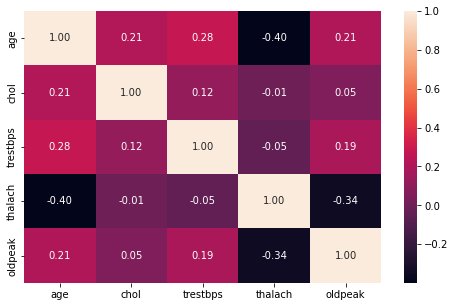

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(heart_data[numerical_features].corr(), annot=True, fmt='.2f')
plt.show()

## Observations

Overall, the correlation between numerical features is weak at best:
- We observe a positive correlation between cholesterol and age.
- We can also see that resting blood pressure is positively correlated to cholesterol.
- **The age/cholesterol graph indicate that older patients with high cholesterol are more likely to have heart disease.**
- Surprisingly, there is no visible correlation between maximum heart rate achieved and cholesterol 
- However, the reg-plots indicate a negative correlation between maximum heart rate achieved and age as expected.
- From the pair-plot we saw that **younger patients with a higher maximum heart rate achieved are more likely to have a heart condition, whereas Lower ST depression regardless of age is likely an indication of a heart disease.**


## Exploring Categorical features                                                          

In [7]:
categorial_features = ['sex', 'fbs','exang', 'cp', 'restecg', 'slope', 'thal', 'target']

### Distribution: Count plots

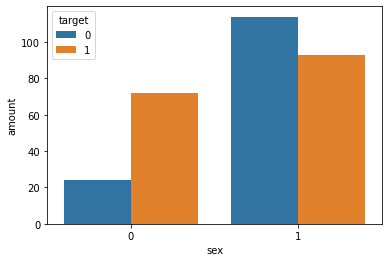

In [33]:
sex_graph = sns.countplot(data=heart_data, x='sex', hue=heart_data["target"])
sex_graph.set_ylabel("amount")
plt.show()

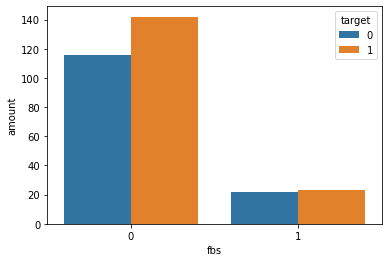

In [39]:
fbs_graph = sns.countplot(data=heart_data, x='fbs', hue=heart_data["target"]) # Fasting blood sugar
fbs_graph.set_ylabel("amount")
plt.show()

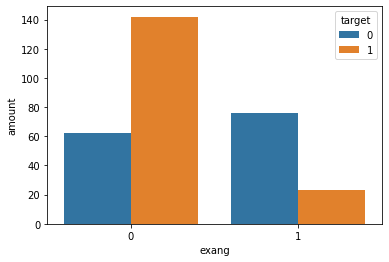

In [40]:
exang_graph = sns.countplot(data=heart_data, x='exang', hue=heart_data["target"]) # Exercise induced angina
exang_graph.set_ylabel("amount")
plt.show()

Text(0, 0.5, 'amount')

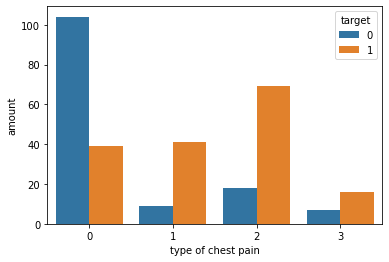

In [41]:
cp_graph = sns.countplot(data=heart_data, x= 'cp', hue="target") # Chest pain
cp_graph.set_xlabel("type of chest pain")
cp_graph.set_ylabel("amount")

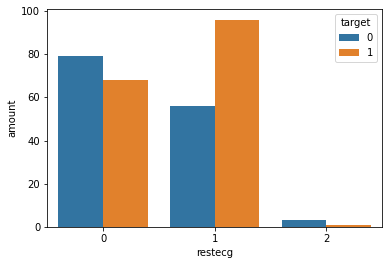

In [42]:
restecg_graph = sns.countplot(data=heart_data, x='restecg', hue="target") # Resting ecg measurement
restecg_graph.set_ylabel("amount")
plt.show()

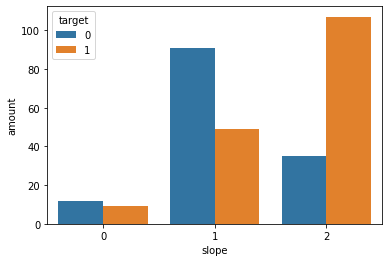

In [43]:
slope_graph = sns.countplot(data=heart_data, x='slope', hue="target") # slope
slope_graph.set_ylabel("amount")
plt.show()

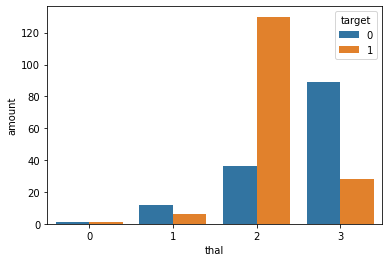

In [44]:
thal_graph = sns.countplot(data=heart_data, x='thal', hue="target") # thalassemia blood disorder 0 is missing/error
thal_graph.set_ylabel("amount")
plt.show()

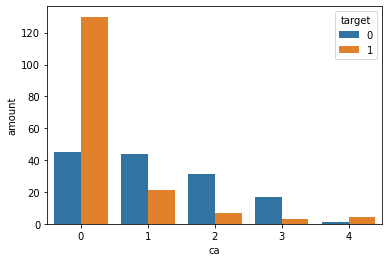

In [45]:
ca_graph = sns.countplot(data=heart_data, x='ca', hue="target") # number of major vessels should be 0-3
ca_graph.set_ylabel("amount")
plt.show()

### Statistical summary of the categorical features

Here we observe the correlation between the categorical features and the target using a count-plot:
- According to the dataset females seem to suffer from heart disease more than males.
- The majority of patients have a fasting blood sugar lower than 120mg/dl. However, there isn't any strong evidence that fasting blood sugar is correlated to having heart disease.
- Around 3/4 of the patients with exercise induced angina were not identified to have heart disease. 
- Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.
- The majority of patients with ST-T wave abnormality REC test were found to have heart disease.
- The majority of patients with downsloping ST-slopes have heart disease whereas the majority of patients with a flat ST-slope do not have heart disease. Unsloping-ST appears to have no correlation with heart disease.

# Data Pre-processing
We now begin data pre-processing to prepare the data for the machine learning models

In [34]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**From the data types we see that all features are int64/float64 meaning all categorical features have already been label encoded and therefore no label encoding is required.** 

In [35]:
# checking for null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There appears to be no missing values however:**
- According to the featureset description, any thal value of 0 is considered to be missing/error data and therefore needs to be removed from the dataset.
- The number of major vessel, according to the featureset description range from 0-3. All data entries with a ca value not within this range must also be removed.

## Data cleaning

In [36]:
heart_data = heart_data[heart_data['ca'] < 4] #drop incorrect ca values 
heart_data = heart_data[heart_data['thal'] > 0] # drop incorrect/missing thal value
print("Total number of records: {}".format(len(heart_data)))

Total number of records: 296


## Feature Selection

In [37]:
# Assigning the features to the variable X, and the labels to the variable y. 
X=heart_data.iloc[:,0:13].values
y=heart_data.iloc[:,13].values

## Splitting Data into Training and Test Set

We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [38]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) 

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 236 samples.
Testing set has 60 samples.


In [39]:
#training data are shuffled 
y_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [40]:
#test data are shuffled 
y_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
#inspect the Standardlised first featuer 
print(X_train_std[:,0].mean())
print(X_train_std[:,0].std())

-2.483888800856282e-16
0.9999999999999996


## Evaluating Model Performance
In this section, we will investigate 9 different algorithms, and determine which is best at modeling the data. The 9th algorithm is known as a naive predictor.

### Metrics: Confusion Matrix

![](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

Misclassifying an individual that has heart disease would be detrimental since it could lead to death.
Therefore, a model's ability to **recall** all individuals that have heart disease is more important than the model's ability to **precisely** predict those individuals, since further tests can be carried out on individuals who have been identified as having heart disease.

We can therefore use a F-beta score as a metric that considers both precision and recall

![](https://hasty.ai/media/pages/docs/mp-wiki/metrics/f-beta-score/eda622701c-1654854973/snimok-ekrana-2022-06-10-v-12-51-10.webp)

In particular, when β=2.0, the F-Score gives less weight to precision and more weight to recall in the calculation of the score. This is called the **F2 score**.

### The Naive Predictor
In cases where the target is imbalanced this can greatly affect accuracy, whereby the model could achieve a high accuracy just by predicting the majority class and therefore without learning properly from the features of the data. Making such a prediction would be called **naive**, since we have not considered any information to substantiate the claim. 

**We will therefore consider the naive prediction for our data, to help establish a benchmark for whether a model is performing well.** 

In [43]:
'''
TP = np.sum(target) # Counting the ones as this is the naive case. 
FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

'''
target = heart_data['target']

# Calculate accuracy, precision and recall
accuracy = (np.sum(target)) / ((np.sum(target)) + float(((target.count()) - np.sum(target))))
recall = np.sum(target) / float((np.sum(target) + 0))
precision = np.sum(target) / float(((np.sum(target) + ((target.count()) - np.sum(target)))))
beta = 2

f2_score = (1+ beta**2) * (precision * recall) / ((beta ** 2 * precision) + recall)

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, f2_score))

Naive Predictor: [Accuracy score: 0.5405, F-score: 0.8547]



# Supervised Learning Models
We are now ready to begin training our selected machine learning models on the dataset.

In [44]:
# importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# importing performance metrics
from sklearn.metrics import accuracy_score

In [45]:
# Create the Logistic Regression model and assign it to the variable model.
model = LogisticRegression(solver="liblinear", random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_lr = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print('Test Misclassifications: %d' % (y_test != y_test_pred_lr).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_lr)

Test Misclassifications: 9
Training Misclassifications: 28
The training accuracy is 0.8813559322033898
The test accuracy is 0.85


In [46]:
# Create the k-nn model and assign it to the variable model.
model = KNeighborsClassifier(2)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_kn = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_kn = accuracy_score(y_test, y_test_pred_kn)

print('Test Misclassifications: %d' % (y_test != y_test_pred_kn).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_kn)

Test Misclassifications: 24
Training Misclassifications: 47
The training accuracy is 0.8008474576271186
The test accuracy is 0.6


In [47]:
# Create the SVM model and assign it to the variable model.
model = SVC(probability=True, random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_svm = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print('Test Misclassifications: %d' % (y_test != y_test_pred_svm).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_svm)

Test Misclassifications: 20
Training Misclassifications: 81
The training accuracy is 0.6567796610169492
The test accuracy is 0.6666666666666666


In [48]:
# Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier(random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_dt = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print('Test Misclassifications: %d' % (y_test != y_test_pred_dt).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_dt)

Test Misclassifications: 17
Training Misclassifications: 0
The training accuracy is 1.0
The test accuracy is 0.7166666666666667


In [51]:
# Create the Random Forest model and assign it to the variable model.
model = RandomForestClassifier(random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_rf = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Test Misclassifications: %d' % (y_test != y_test_pred_rf).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_rf)

Test Misclassifications: 12
Training Misclassifications: 0
The training accuracy is 1.0
The test accuracy is 0.8


In [52]:
# Create the AdaBoost model and assign it to the variable model.
model = AdaBoostClassifier(random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_ada = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)

print('Test Misclassifications: %d' % (y_test != y_test_pred_ada).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_ada)

Test Misclassifications: 9
Training Misclassifications: 18
The training accuracy is 0.923728813559322
The test accuracy is 0.85


In [53]:
# Create the GradientBoosting model and assign it to the variable model.
model = GradientBoostingClassifier(random_state=1)

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_gb = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

print('Test Misclassifications: %d' % (y_test != y_test_pred_gb).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_gb)

Test Misclassifications: 12
Training Misclassifications: 1
The training accuracy is 0.9957627118644068
The test accuracy is 0.8


In [55]:
# Create the XGBoost model and assign it to the variable model.
model = xgb.XGBClassifier()

# Fit the model.
model.fit(X_train,y_train)

# Make predictions. Store them in the variable y_pred.
y_train_pred = model.predict(X_train)
y_test_pred_xgb = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print('Test Misclassifications: %d' % (y_test != y_test_pred_xgb).sum())
print('Training Misclassifications: %d' % (y_train != y_train_pred).sum())
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy_xgb )

Test Misclassifications: 13
Training Misclassifications: 0
The training accuracy is 1.0
The test accuracy is 0.7833333333333333


## Model Evaluation Metrics

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc

In [57]:
def print_metrics(y_test, y_test_pred, model_name):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''    
    #print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_test, y_test_pred)))
    print('Confusion Matrix ' + model_name + ' :''\n', format(confusion_matrix(y_test, y_test_pred)))
    print('Precision score ' + model_name + ' :', format(precision_score(y_test, y_test_pred)))
    print('Recall score ' + model_name + ' :', format(recall_score(y_test, y_test_pred)))
    print('F2 score ' + model_name + ' :', format(fbeta_score(y_test, y_test_pred, beta = 2)))
    
    
    #format(fbeta_score(y_test, y_test_pred, beta = 2))

In [58]:
# Print Logistic Regression scores
print_metrics(y_test, y_test_pred_lr, 'Logistic Regression')

Confusion Matrix Logistic Regression :
 [[24  4]
 [ 5 27]]
Precision score Logistic Regression : 0.8709677419354839
Recall score Logistic Regression : 0.84375
F2 score Logistic Regression : 0.8490566037735848


In [59]:
# Print KNeighbors scores
print_metrics(y_test, y_test_pred_kn, 'KNeighbors')

Confusion Matrix KNeighbors :
 [[25  3]
 [21 11]]
Precision score KNeighbors : 0.7857142857142857
Recall score KNeighbors : 0.34375
F2 score KNeighbors : 0.38732394366197187


In [60]:
# Print Support Vector Machine scores
print_metrics(y_test, y_test_pred_svm, 'Support Vector Machine')

Confusion Matrix Support Vector Machine :
 [[12 16]
 [ 4 28]]
Precision score Support Vector Machine : 0.6363636363636364
Recall score Support Vector Machine : 0.875
F2 score Support Vector Machine : 0.813953488372093


In [61]:
# Print Decsion Tree scores
print_metrics(y_test, y_test_pred_dt, 'Decsion Tree')

Confusion Matrix Decsion Tree :
 [[19  9]
 [ 8 24]]
Precision score Decsion Tree : 0.7272727272727273
Recall score Decsion Tree : 0.75
F2 score Decsion Tree : 0.7453416149068324


In [62]:
# Print Random Forest scores
print_metrics(y_test, y_test_pred_rf, 'Random Forest')

Confusion Matrix Random Forest :
 [[22  6]
 [ 6 26]]
Precision score Random Forest : 0.8125
Recall score Random Forest : 0.8125
F2 score Random Forest : 0.8125


In [63]:
# Print AdaBoost scores
print_metrics(y_test, y_test_pred_ada, 'AdaBoost')

Confusion Matrix AdaBoost :
 [[23  5]
 [ 4 28]]
Precision score AdaBoost : 0.8484848484848485
Recall score AdaBoost : 0.875
F2 score AdaBoost : 0.8695652173913042


In [64]:
# Print GradientBoosting scores
print_metrics(y_test, y_test_pred_gb, 'GradientBoosting')

Confusion Matrix GradientBoosting :
 [[22  6]
 [ 6 26]]
Precision score GradientBoosting : 0.8125
Recall score GradientBoosting : 0.8125
F2 score GradientBoosting : 0.8125


In [65]:
# Print XGBoost Classifier scores
print_metrics(y_test, y_test_pred_xgb, 'XGBoost')

Confusion Matrix XGBoost :
 [[21  7]
 [ 6 26]]
Precision score XGBoost : 0.7878787878787878
Recall score XGBoost : 0.8125
F2 score XGBoost : 0.8074534161490683


## Model comparison summary

In [66]:
results = pd.DataFrame({
    'Model': [ 
              'Logistic Regression',
              'KNeighbors',
              'Support Vector Machine',
              'Decision Tree',
              'Random Forest',
              'AdaBoost',
              'GradientBoosting',
              'XGBoost'],
    "Accuracy":[
                test_accuracy_lr,
                test_accuracy_kn,
                test_accuracy_svm,
                test_accuracy_dt,
                test_accuracy_rf,
                test_accuracy_ada,
                test_accuracy_gb,
                test_accuracy_xgb],
    "Precision":[
                    0.871,
                    0.786,
                    0.636,
                    0.727,
                    0.813,
                    0.848,
                    0.813,
                    0.788],
    "Recall":[
                    0.844,
                    0.344,
                    0.875,
                    0.75,
                    0.813,
                    0.875,
                    0.813,
                    0.813],
   "F2 score":[
                    0.849,
                    0.387,
                    0.814,
                    0.745,
                    0.813,
                    0.870,
                    0.813,
                    0.807]})
#result_df = results.sort_values(by='Fbeta score', ascending=False)
result_df = results.reset_index(drop=True)
result_df

,Model,Accuracy,Precision,Recall,F2 score
0,Logistic Regression,0.850000,0.871,0.844,0.849
1,KNeighbors,0.600000,0.786,0.344,0.387
2,Support Vector Machine,0.666667,0.636,0.875,0.814
3,Decision Tree,0.716667,0.727,0.750,0.745
4,Random Forest,0.800000,0.813,0.813,0.813
5,AdaBoost,0.850000,0.848,0.875,0.870
6,GradientBoosting,0.800000,0.813,0.813,0.813
7,XGBoost,0.783333,0.788,0.813,0.807


## Receiver operating characteristic (ROC) curves

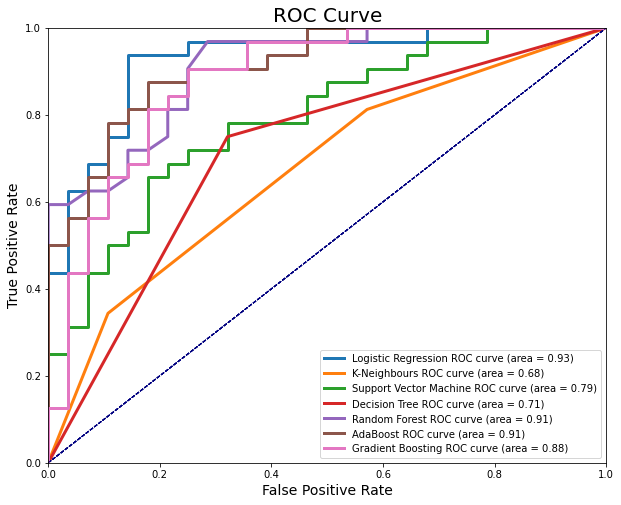

In [67]:
model_names = [
    'Logistic Regression',
    'K-Neighbours',
    'Support Vector Machine',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting']

models = [
    LogisticRegression(solver="liblinear", random_state=1),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=1),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    AdaBoostClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1)]

   
plt.figure(figsize=(10, 8))   
        
for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
        
    predict_probalities = model.predict_proba(X_test)[:, 1]
        
    f, t, thresholds = roc_curve(y_test, predict_probalities)
    roc_auc = auc(f, t)
       
    plt.plot(f, t, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve', fontsize=20)
    plt.legend(loc="lower right")

# Chosen models: LogisticRegression & AdaBoost

- Based on our performance metrics, the LogisticRegression and the Adaboost algoritms have perfomed the best in terms of Fbeta score and with also relativley high accuracy scores without optimization.
- We will now perfom a grid search optimazation on both models to find the best parameters for each model.

## Parameter Tuning (GridSearchCV): LogisticRegression

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(solver="liblinear", random_state=1) 

param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.1,0.2,0.3]
}
  
scorer = make_scorer(fbeta_score, beta = 2)

grid_obj = GridSearchCV(estimator=model , param_grid=param_grid, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_lr = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (model.fit(X_train, y_train)).predict(X_test)
best_predictions_lr = best_lr.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_lr)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_lr, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.8500
F-score on testing data: 0.8491

Optimized Model
------
Final accuracy score on the testing data: 0.8833
Final F-score on the testing data: 0.9006


## Parameter Tuning (GridSearchCV): AdaBoost 

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score,accuracy_score
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(random_state=1)


parameters = {'n_estimators':[50,75,100,200], 'learning_rate':[0.5,0.8,1,1.2]}


scorer = make_scorer(fbeta_score, beta = 2)


grid_obj = GridSearchCV(estimator=ada_model, param_grid=parameters, scoring=scorer)


grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_ada = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (ada_model.fit(X_train, y_train)).predict(X_test)
best_predictions_ada = best_ada.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_ada)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_ada, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.8500
F-score on testing data: 0.8696

Optimized Model
------
Final accuracy score on the testing data: 0.8667
Final F-score on the testing data: 0.8951


# Final Model Evaluation

|     Metric     | Benchmark Predictor | Unoptimized LogisticRegression| Optimized LogisticRegression|
| :------------: | :-----------------: | :---------------:             | :-------------:             | 
| Accuracy Score |    0.5405           |     0.8500                    | 0.8833                      |
| F-score        |    0.8547           |   0.8491                      |   0.9006                    |

|     Metric     | Benchmark Predictor | Unoptimized AdaBoost| Optimized AdaBoost|
| :------------: | :-----------------: | :---------------:   | :-------------:   | 
| Accuracy Score |    0.5405           |     0.8500          | 0.8667            |
| F-score        |    0.8547           |   0.8696            |   0.8951          |

# Extracting Feature Importance
To perform the feature extraction, we are using Random Forest’s feature_importance_ attribute which is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

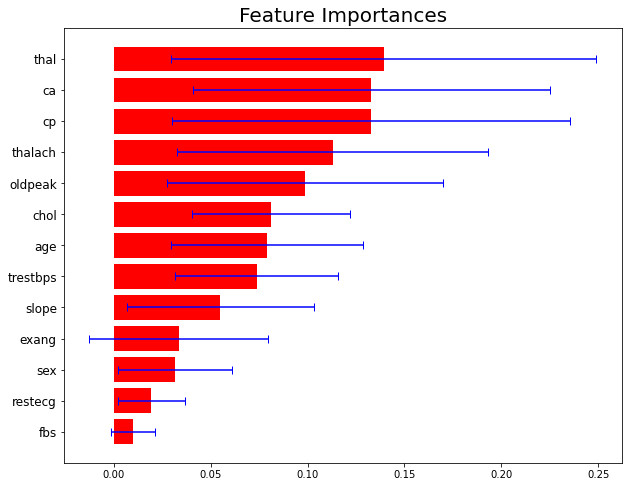

In [75]:
feature_names = list(heart_data.columns)

model = RandomForestClassifier(random_state=1).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=20)
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices],align="center", ecolor="blue", capsize=4)

plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices], fontsize=12)
plt.ylim([-1, X.shape[1]])
plt.show()

## Feature Selection
We will use the first 6 features to re-train the 2 chosen optimized models

In [76]:
# Assigning the features to the variable X, and the labels to the variable y. 
X2=heart_data.iloc[:,[12,11,2,7,9,4]].values
y2=heart_data.iloc[:,13].values

## Splitting Data into Training and Test Set

We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [77]:
from sklearn.model_selection import train_test_split 


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1, stratify=y) 

# Show the results of the split
print("Training set has {} samples.".format(X_train2.shape[0]))
print("Testing set has {} samples.".format(X_test2.shape[0]))

Training set has 236 samples.
Testing set has 60 samples.


## Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train2)
X_train_std2 = sc.transform(X_train2)
X_test_std2 = sc.transform(X_test2)

In [79]:
#inspect the Standardlised first featuer 
print(X_train_std2[:,0].mean())
print(X_train_std2[:,0].std())

-3.8763719164878347e-16
0.9999999999999992


### Training LogisticRegression with reduced features

In [80]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train2
X_test_reduced = X_test2

# Train on the "best" model found from grid search earlier
model = (clone(best_lr)).fit(X_train_reduced, y_train2)

# Make new predictions
reduced_predictions = model.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("\Opitmized LogisticRegression on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test2, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test2, reduced_predictions, beta = 2)))

\Opitmized LogisticRegression on reduced data
------
Accuracy on testing data: 0.8500
F-score on testing data: 0.8491


### Training AdaBoost with reduced features

In [81]:
# Reduce the feature space
X_train_reduced = X_train2
X_test_reduced = X_test2

# Train on the "best" model found from grid search earlier
model = (clone(best_ada)).fit(X_train_reduced, y_train2)

# Make new predictions
reduced_predictions = model.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("\nOptimized AdaBoost on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test2, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test2, reduced_predictions, beta = 2)))


Optimized AdaBoost on reduced data
------
Accuracy on testing data: 0.8500
F-score on testing data: 0.8696


## Effects of Feature Selection

- Reduced accuracy of both models either due to loss of information or error in feature importance.
- Could work better with larger dataset.

# References

**Introduction**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb

**Loading dataset**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb

**Data Pre-processing**
- https://github.com/rasbt/python-machine-learning-book-3rd-edition

**Evaluating Model Performance**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb

**The Naive Predictor**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb

**Supervised Learning Models**
- https://www.udacity.com/course/intro-to-machine-learning-with-tensorflow-nanodegree--nd230
- https://github.com/rasbt/python-machine-learning-book-3rd-edition

**Model Evaluation Metrics**
- https://github.com/rasbt/python-machine-learning-book-3rd-edition
- https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes/notebook

**Model Comparison Summary**
- https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes/notebook

**Parameter Tuning (GridSearchCV): LogisticRegression**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb

**Extracting Feature Importance**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb
- https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names

**Feature Selection**
- https://github.com/robertyoung2/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb